<a href="https://colab.research.google.com/github/Ramatata66/Ramatata66/blob/main/Geri_D%C3%B6n%C3%BC%C5%9F%C3%BCm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Kaggle datasetini indirme
path = kagglehub.dataset_download("prajwaldongre/global-plastic-waste-2023-a-country-wise-analysis")

# Klasördeki dosyaları listeleme
files = os.listdir(path)
print("Klasördeki Dosyalar:", files)

# İndirilen CSV dosyasını okuma
csv_file = [file for file in files if file.endswith('.csv')][0]  # İlk CSV dosyasını seç
csv_path = os.path.join(path, csv_file)
data = pd.read_csv(csv_path)

# Verinin ilk 5 satırını görüntüleme
print("Verinin İlk 5 Satırı:")
print(data.head())

# Veri setindeki eksik değerleri kontrol etme
print("\nEksik Değer Kontrolü:")
print(data.isnull().sum())

# Temel istatistiksel özet
print("\nTemel İstatistiksel Özet:")
print(data.describe())


100%|██████████| 2.74k/2.74k [00:00<00:00, 5.87MB/s]

Extracting files...
Klasördeki Dosyalar: ['Plastic Waste Around the World.csv']
Verinin İlk 5 Satırı:
         Country  Total_Plastic_Waste_MT           Main_Sources  \
0          China                   59.08   Packaging_Industrial   
1  United States                   42.02     Packaging_Consumer   
2          India                   26.33         Consumer_Goods   
3          Japan                    7.99  Packaging_Electronics   
4        Germany                    6.28   Automotive_Packaging   

   Recycling_Rate  Per_Capita_Waste_KG Coastal_Waste_Risk  
0            29.8                 41.2               High  
1            32.1                127.5             Medium  
2            11.5                 19.3               High  
3            84.8                 63.2             Medium  
4            56.1                 75.6                Low  

Eksik Değer Kontrolü:
Country                   0
Total_Plastic_Waste_MT    0
Main_Sources              0
Recycling_Rate            0




Kategorik Değerlerin Dağılımı:
Country için benzersiz değerler:
Country
China         1
Botswana      1
Eswatini      1
Madagascar    1
Comoros       1
             ..
Tunisia       1
Sri Lanka     1
Azerbaijan    1
Croatia       1
Nauru         1
Name: count, Length: 165, dtype: int64
Main_Sources için benzersiz değerler:
Main_Sources
Consumer_Packaging       131
Industrial_Packaging      14
Packaging_Consumer         5
Packaging_Industrial       4
Industrial_Consumer        4
Food_Packaging             3
Consumer_Goods             1
Packaging_Electronics      1
Automotive_Packaging       1
Electronics_Packaging      1
Name: count, dtype: int64
Coastal_Waste_Risk için benzersiz değerler:
Coastal_Waste_Risk
High         74
Low          54
Medium       33
Very_High     4
Name: count, dtype: int64




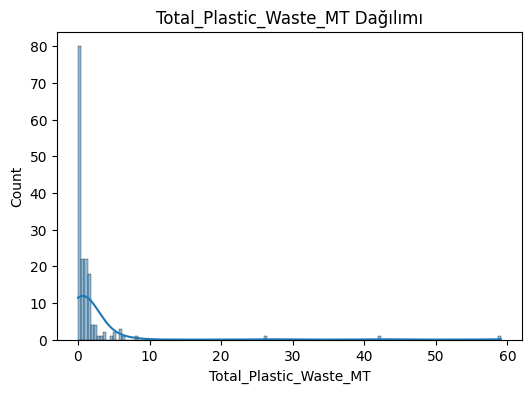

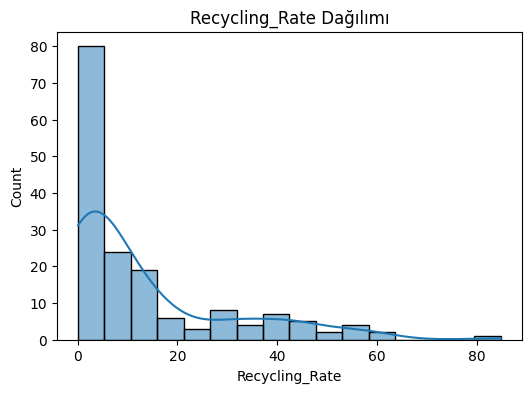

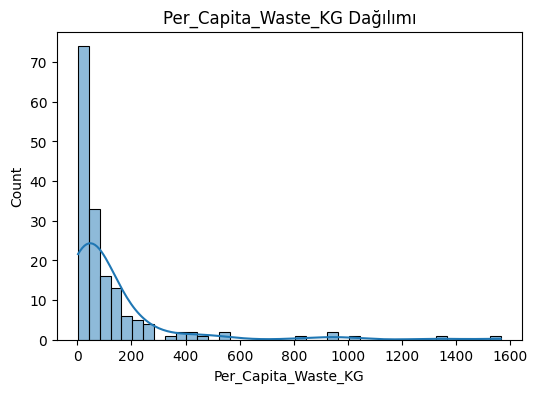

In [2]:
# Kategorik ve sayısal verilerin ayrımı
categorical_columns = ['Country', 'Main_Sources', 'Coastal_Waste_Risk']
numerical_columns = ['Total_Plastic_Waste_MT', 'Recycling_Rate', 'Per_Capita_Waste_KG']

# Kategorik sütunlardaki benzersiz değerler
print("\n\nKategorik Değerlerin Dağılımı:")
for col in categorical_columns:
    print(f"{col} için benzersiz değerler:")
    print(data[col].value_counts())


# Sayısal verilerin dağılımını görselleştirme
for col in numerical_columns:
    print("\n")
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"{col} Dağılımı")
    plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, silhouette_score, classification_report

data_encoded = data.copy()
label_encoders = {}


categorical_columns = ['Main_Sources', 'Coastal_Waste_Risk']
for col in categorical_columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le

numerical_columns = ['Total_Plastic_Waste_MT', 'Per_Capita_Waste_KG', 'Recycling_Rate']
scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

X = data_encoded[['Total_Plastic_Waste_MT', 'Main_Sources', 'Per_Capita_Waste_KG', 'Coastal_Waste_Risk']]
y = data_encoded['Recycling_Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Performanslarını Saklamak İçin Liste
model_performances = []




Random Forest

In [4]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
model_performances.append(('Random Forest', rf_mse))

K Means

In [5]:
from sklearn.cluster import KMeans

X_kmeans = data_encoded[numerical_columns]
kmeans = KMeans(n_clusters=3, random_state=42)
data_encoded['Cluster'] = kmeans.fit_predict(X_kmeans)
silhouette_avg = silhouette_score(X_kmeans, data_encoded['Cluster'])
model_performances.append(('K-Means (Silhouette)', silhouette_avg))

Support Vector Regression (SVR)

In [6]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, y_pred_svr)
model_performances.append(('SVR', svr_mse))

Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
model_performances.append(('Linear Regression', lr_mse))

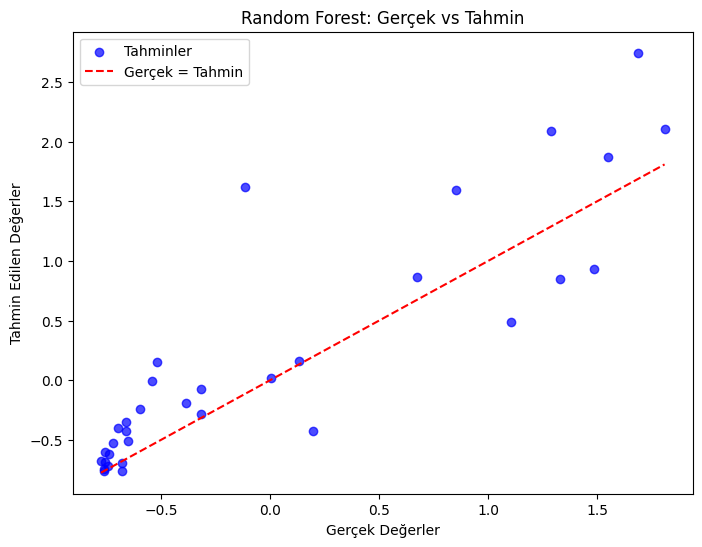

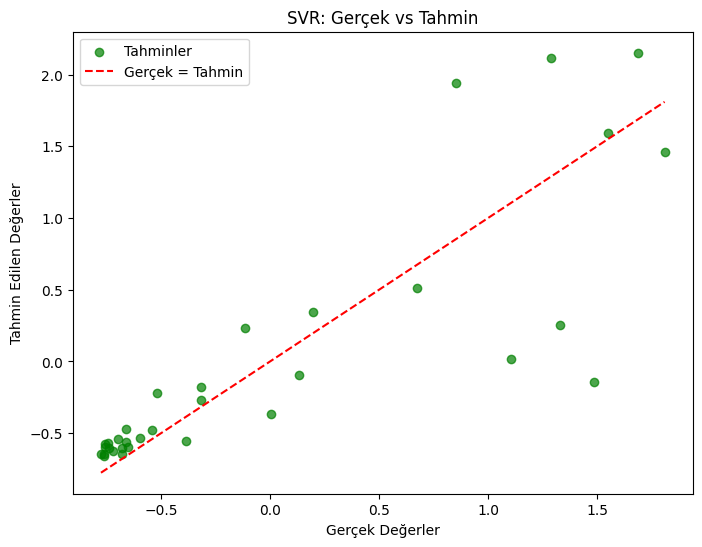

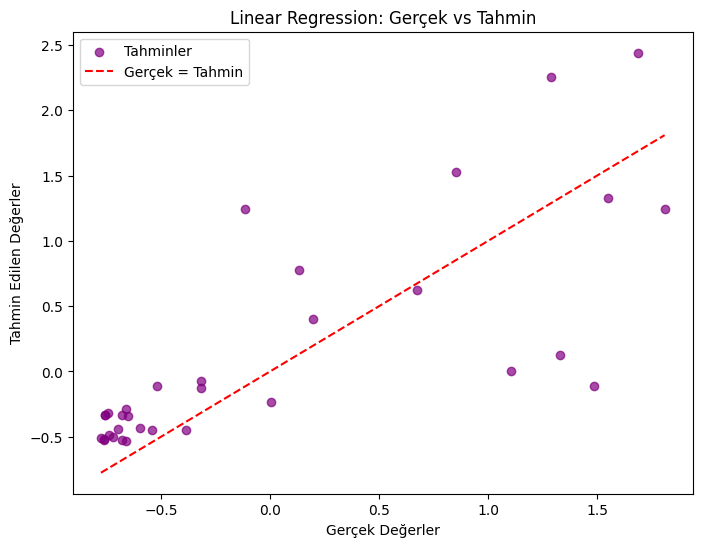

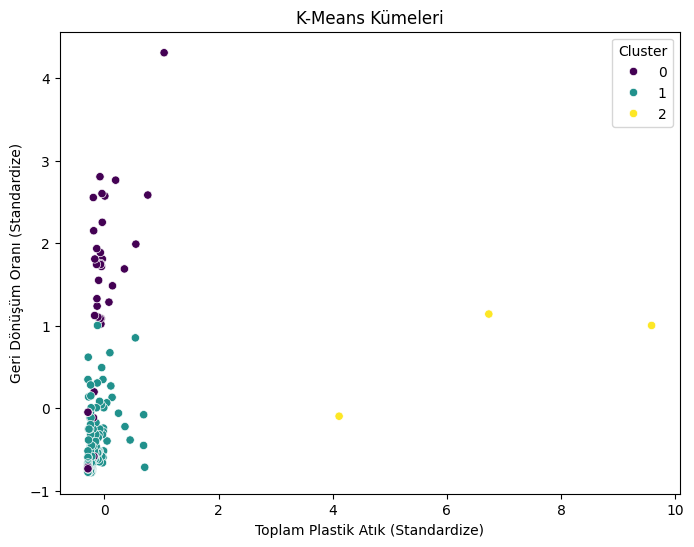

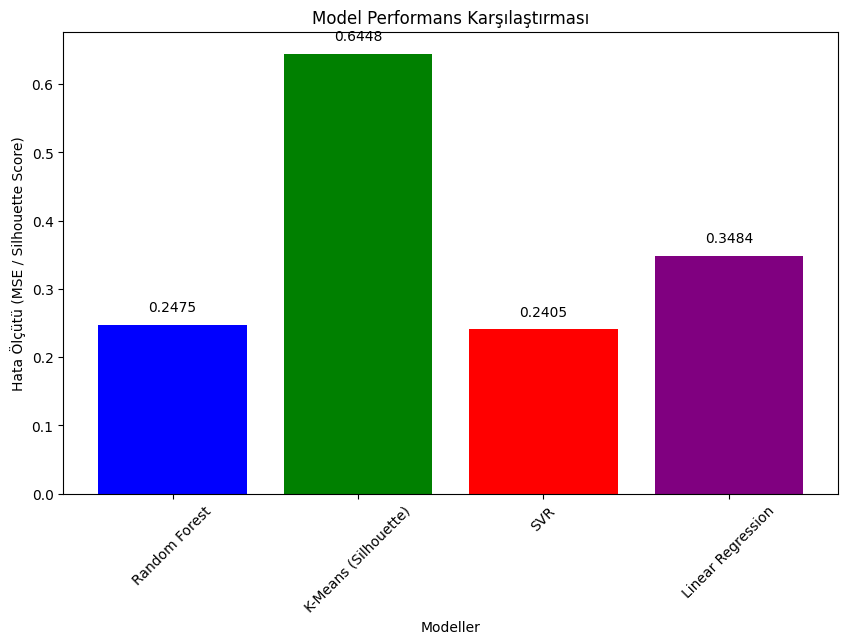

Model Performansları:
Random Forest: 0.2475
K-Means (Silhouette): 0.6448
SVR: 0.2405
Linear Regression: 0.3484


In [8]:
# Gerçek vs Tahmin Grafikleri
models = [
    ('Random Forest', y_pred_rf, "blue"),
    ('SVR', y_pred_svr, "green"),
    ('Linear Regression', y_pred_lr, "purple")
]

for model_name, y_pred, color in models:
    print("\n\n")
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color=color, label="Tahminler")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Gerçek = Tahmin")
    plt.title(f"{model_name}: Gerçek vs Tahmin")
    plt.xlabel("Gerçek Değerler")
    plt.ylabel("Tahmin Edilen Değerler")
    plt.legend()
    plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_encoded['Total_Plastic_Waste_MT'],
                y=data_encoded['Recycling_Rate'],
                hue=data_encoded['Cluster'], palette="viridis")
plt.title("K-Means Kümeleri")
plt.xlabel("Toplam Plastik Atık (Standardize)")
plt.ylabel("Geri Dönüşüm Oranı (Standardize)")
plt.show()


model_names, performance_values = zip(*model_performances)

# Performans Karşılaştırması Bar Grafiği
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, performance_values, color=['blue', 'green', 'red', 'purple'])
plt.title("Model Performans Karşılaştırması")
plt.ylabel("Hata Ölçütü (MSE / Silhouette Score)")
plt.xlabel("Modeller")
plt.xticks(rotation=45)

# Barlar Üzerine Sayısal Değerleri Yazdırma
for bar, value in zip(bars, performance_values):
    print("\n\n")
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f"{value:.4f}", ha='center', fontsize=10, color='black')

plt.show()

# Sayısal Değerlerin Yazdırılması
print("Model Performansları:")
for model, value in model_performances:
    print(f"{model}: {value:.4f}")


<ipython-input-9-02bb44403ed3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20, x='Country', y='Recycling_Rate', palette=colors)  # Barplot


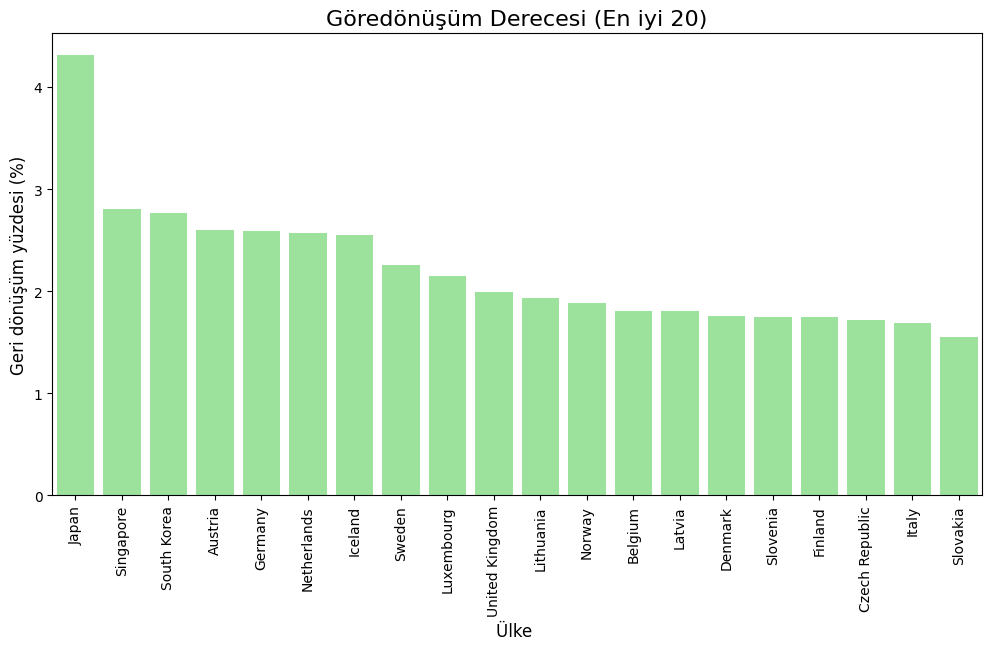

In [9]:

top_20 = data_encoded.sort_values(by='Recycling_Rate', ascending=False).head(20)

colors = ['lightgreen' if rate <= 50 else 'darkgreen' for rate in top_20['Recycling_Rate']]


plt.figure(figsize=(12, 6))  # Grafik boyutunu ayarlayın
sns.barplot(data=top_20, x='Country', y='Recycling_Rate', palette=colors)  # Barplot

# Başlık ve etiketleri ekleme
plt.title('Göredönüşüm Derecesi (En iyi 20)', fontsize=16)
plt.xlabel('Ülke ', fontsize=12)
plt.ylabel('Geri dönüşüm yüzdesi (%)', fontsize=12)

# X eksenindeki ülke isimlerini dikey olarak yazdırma
plt.xticks(rotation=90, fontsize=10)

# Grafiği gösterme
plt.show()

<ipython-input-10-21b67bd8d385>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20, x='Country', y='Total_Plastic_Waste_MT', palette='Reds_r')


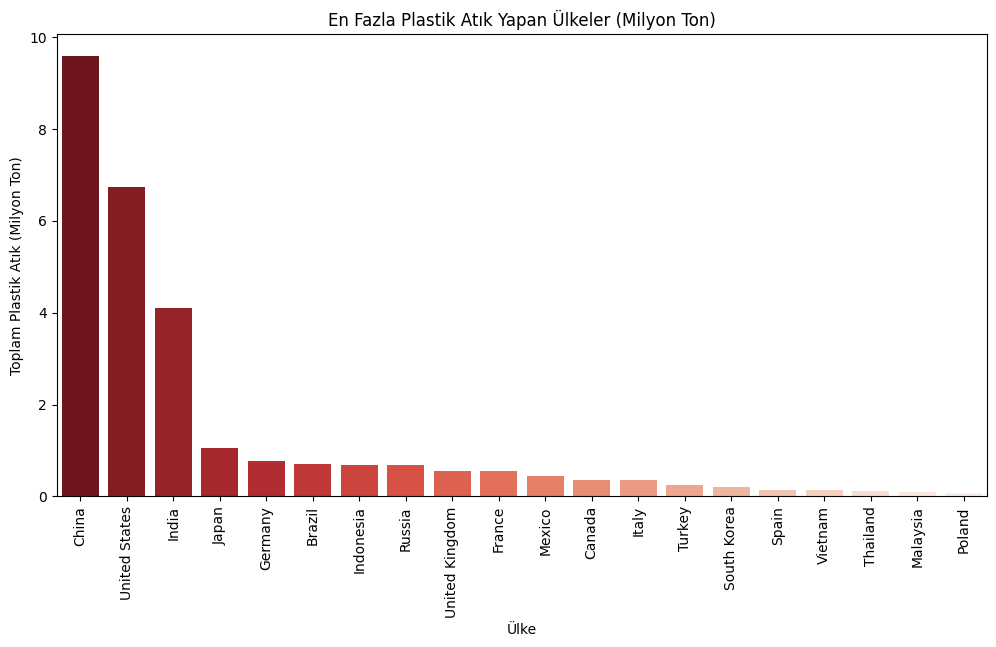

In [10]:
top_20 = data_encoded.nlargest(20, 'Total_Plastic_Waste_MT')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_20, x='Country', y='Total_Plastic_Waste_MT', palette='Reds_r')

plt.title('En Fazla Plastik Atık Yapan Ülkeler (Milyon Ton)')
plt.xlabel('Ülke')
plt.ylabel('Toplam Plastik Atık (Milyon Ton)')
plt.xticks(rotation=90)
plt.show()